In [ ]:
1. Importing Libraries and Data

In [19]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [20]:
# Import the cleaned “world_university_ranking.csv” file
df_ranking = pd.read_csv(r'C:\Users\49157\Downloads\Data analysis course\Advanced analytics and dashboard designs\World University Rankings\Rankings_data_cleaned.csv', index_col = False)

In [22]:
df_ranking.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,1.0,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,2.0,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,4.0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,13.0,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,24.5,18,85.21,2012


In [23]:
#  Converting the 'year' column to datetime format, i.e, extracting specific parts of the date (year, month, day).
df_ranking['year'] = pd.to_datetime(df_ranking['year'], format='%Y')

In [24]:
# Checking the number of rows and columns
df_ranking.shape

(2199, 14)

In [25]:
# Checking the columns
df_ranking.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [26]:
# Setting the 'date' column as the index
df_ranking.set_index('year', inplace=True)

In [29]:
# Resample the data to monthly frequency, summing the number of quality_of_education
df = df_ranking['publications'].resample('M').sum()

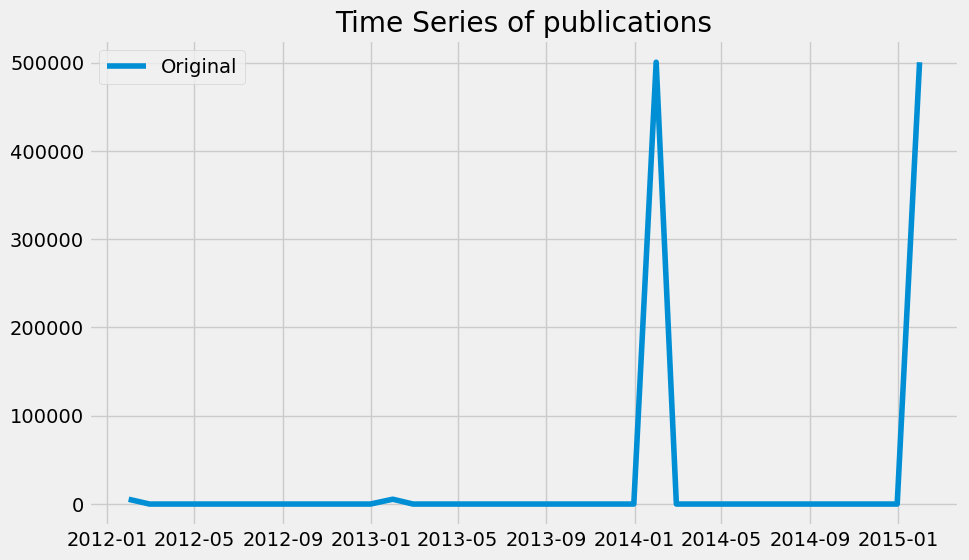

In [30]:
# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original')
plt.title('Time Series of publications')
plt.legend()
plt.show()

# The time series plot titled "Time Series of publications" shows the trend of publications over a period from early 2012 to early 2015. The y-axis represents the number of publications, while the x-axis represents the time in years. The time series plot shows that from early 2012 to late 2013, the number of publications remains consistently low, near zero. There is a significant spike in the number of publications around early 2014, reaching a peak of over 500,000. After this  significant spike, the number of publications drops sharply back to zero and stays low until early 2015, where it spikes again at the end of the period. This pattern indicates that there were specific events or activities during these spikes that drastically increased the number of publications. The low values during other periods suggest minimal publication activity outside these peak times. 

# Other metrics that could be tracked over time are alumni_employment, quality of faculty, quality of education, influence, citations, broad impact and patents

Time-series analysis: decomposition

In [31]:
# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=3)

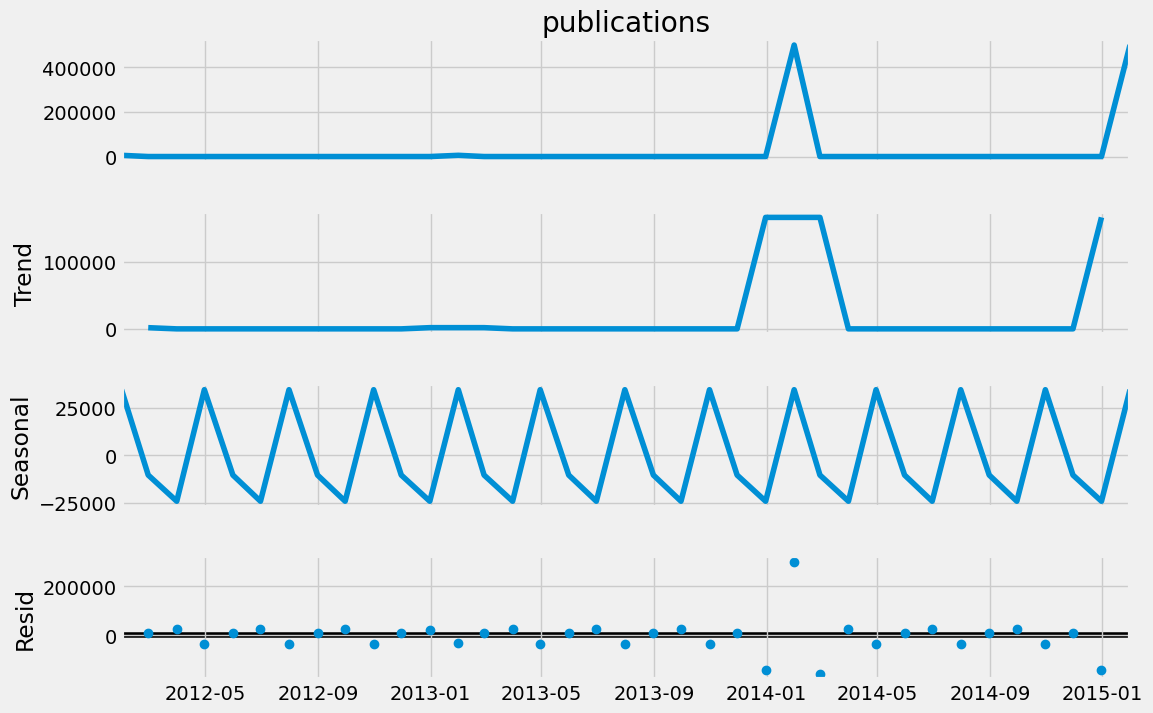

In [32]:
# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

# From 2012 to the end of 2013, the publication trend remained stagnant, indicating stable research output. Early 2014 saw a spike, likely due to increased research activity, funding, or major conferences. This spike was followed by a drop in mid-2014, possibly due to project completions and from mid to late 2014, the trend stabilized again.. The seasonal component could explain the spikes and drops, while irregular events might have caused short-term deviations. Overall, the trend shows periods of stability punctuated by significant fluctuations due to various factors.
# The seasonality component shows regular, predictable fluctuations in publication trends, represented by a spikey curve that changes at consistent intervals.
# The third component which is the noise or residual shows that there is not much unexplained noise apart from the time period around early 2014. During this time period, significant deviations occurred, suggesting irregular events that influences number of publictions.

Testing for stationarity

In [33]:
# Function to perform and display the Dickey-Fuller test results
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print(result)

# Apply the test using the function on the time series
dickey_fuller(df)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.432071
p-value                         0.000260
Number of Lags Used             0.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


In [ ]:
p-value = 0.000260 < 0.05
and Test Statistic < critical values
=> data is stationary!

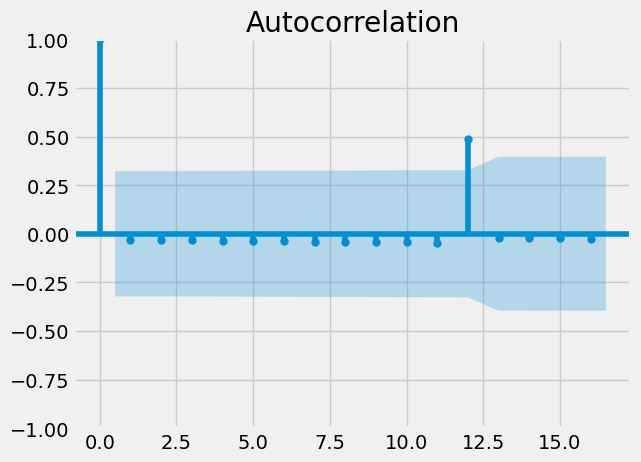

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df)
plt.show()